# Alphavantage Intraday
* API for "real time" stock data
* Freeium model - sign up fro free account to get API key
* Can make API calls directly or install the helper library:
pip install alpha_vantage from the command line

#### https://alphavantage.co

### 1. Set up Environment

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from alpha_vantage.timeseries import TimeSeries

### 2. Store API Key

In [2]:
# replace with your own API key
key = '8T87D2KT1SOI8DBO'

### 3. Create TimeSeries Object and Make API Call

In [3]:
ts = TimeSeries(key, output_format='pandas')
data, meta = ts.get_intraday('TSLA', interval='1min', outputsize='full')

### 4. Examine Data

In [5]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2021-12-31 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6656 entries, 2021-12-31 20:00:00 to 2021-12-20 04:01:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    6656 non-null   float64
 1   2. high    6656 non-null   float64
 2   3. low     6656 non-null   float64
 3   4. close   6656 non-null   float64
 4   5. volume  6656 non-null   float64
dtypes: float64(5)
memory usage: 312.0 KB


In [7]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-12-31 20:00:00,1062.60,1062.9000,1062.52,1062.90,2289.0
2021-12-31 19:59:00,1062.80,1062.8000,1062.55,1062.55,1373.0
2021-12-31 19:58:00,1062.80,1062.8000,1062.80,1062.80,388.0
2021-12-31 19:57:00,1062.80,1062.9099,1062.50,1062.80,1021.0
2021-12-31 19:56:00,1062.75,1062.7500,1062.75,1062.75,299.0


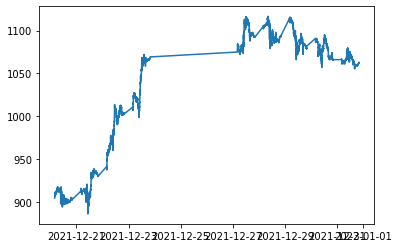

In [8]:
plt.plot(data['4. close'])

### 5. Rename Columns and Add Separate Date and Time Columns

In [10]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [11]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

In [13]:
data.loc['2021-12-31']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-12-31 20:00:00,1062.60,1062.9000,1062.52,1062.90,2289.0,2021-12-31,20:00:00
2021-12-31 19:59:00,1062.80,1062.8000,1062.55,1062.55,1373.0,2021-12-31,19:59:00
2021-12-31 19:58:00,1062.80,1062.8000,1062.80,1062.80,388.0,2021-12-31,19:58:00
2021-12-31 19:57:00,1062.80,1062.9099,1062.50,1062.80,1021.0,2021-12-31,19:57:00
2021-12-31 19:56:00,1062.75,1062.7500,1062.75,1062.75,299.0,2021-12-31,19:56:00
...,...,...,...,...,...,...,...
2021-12-31 04:05:00,1062.00,1063.0000,1062.00,1063.00,3483.0,2021-12-31,04:05:00
2021-12-31 04:04:00,1064.71,1064.7100,1061.40,1061.40,4949.0,2021-12-31,04:04:00
2021-12-31 04:03:00,1065.99,1065.9900,1065.99,1065.99,828.0,2021-12-31,04:03:00


In [14]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)
market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3519 entries, 2021-12-20 09:30:00 to 2021-12-31 16:00:00
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   open       3519 non-null   float64
 1   high       3519 non-null   float64
 2   low        3519 non-null   float64
 3   close      3519 non-null   float64
 4   volume     3519 non-null   float64
 5   TradeDate  3519 non-null   object 
 6   time       3519 non-null   object 
dtypes: float64(5), object(2)
memory usage: 219.9+ KB


In [15]:
market.head()

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-12-20 09:30:00,911.0000,911.3300,910.41,910.9000,8811.0,2021-12-20,09:30:00
2021-12-20 09:31:00,910.7000,913.6450,906.60,909.9999,408400.0,2021-12-20,09:31:00
2021-12-20 09:32:00,909.0000,910.3799,905.00,905.8300,172563.0,2021-12-20,09:32:00
2021-12-20 09:33:00,905.8311,910.0000,903.00,907.2199,208886.0,2021-12-20,09:33:00
2021-12-20 09:34:00,907.2199,907.2200,898.00,898.0200,465179.0,2021-12-20,09:34:00


In [16]:
market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-12-20,893.3900,921.6884
2021-12-21,886.1200,939.5000
2021-12-22,957.0500,1015.6599
2021-12-23,997.5600,1072.9767
2021-12-27,1070.7152,1117.0000
2021-12-28,1078.4200,1118.9999
2021-12-29,1064.1400,1104.0000
2021-12-30,1053.1500,1095.5500
2021-12-31,1054.5900,1081.9999


In [17]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-12-20 11:07:00,895.6900,896.0000,893.3900,894.4399,138831.0,2021-12-20,11:07:00
2021-12-21 10:35:00,889.6999,889.7100,886.1200,886.4200,148388.0,2021-12-21,10:35:00
2021-12-22 09:31:00,965.6600,966.8700,957.0500,960.2000,597344.0,2021-12-22,09:31:00
2021-12-23 09:44:00,998.7099,999.8700,997.5600,999.1600,118173.0,2021-12-23,09:44:00
2021-12-27 09:32:00,1076.0600,1076.9114,1070.7152,1074.3000,131821.0,2021-12-27,09:32:00
2021-12-28 10:15:00,1083.4400,1083.4500,1078.4200,1079.9699,216420.0,2021-12-28,10:15:00
2021-12-29 10:18:00,1065.2374,1069.0250,1064.1400,1067.5300,126213.0,2021-12-29,10:18:00
2021-12-30 09:39:00,1063.0500,1063.3599,1053.1500,1059.4809,241362.0,2021-12-30,09:39:00
2021-12-31 15:59:00,1055.5500,1056.8000,1054.5900,1056.3500,149130.0,2021-12-31,15:59:00


In [18]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-12-20 09:58:00,917.0000,921.6884,914.8400,915.9900,154114.0,2021-12-20,09:58:00
2021-12-21 16:00:00,937.7300,939.5000,937.3600,938.4100,233474.0,2021-12-21,16:00:00
2021-12-22 11:11:00,1013.8400,1015.6599,1011.5900,1012.0300,238334.0,2021-12-22,11:11:00
2021-12-23 14:08:00,1070.5300,1072.9767,1070.0000,1071.7400,119362.0,2021-12-23,14:08:00
2021-12-27 12:02:00,1114.6001,1117.0000,1114.5000,1116.2250,98079.0,2021-12-27,12:02:00
2021-12-28 09:32:00,1109.8900,1118.9999,1109.8900,1111.7300,410585.0,2021-12-28,09:32:00
2021-12-29 09:31:00,1098.6400,1104.0000,1095.8200,1096.0000,354675.0,2021-12-29,09:31:00
2021-12-30 12:17:00,1093.5000,1095.5500,1093.3010,1095.1357,56630.0,2021-12-30,12:17:00
2021-12-31 09:33:00,1075.6832,1081.9999,1075.6832,1079.0150,166035.0,2021-12-31,09:33:00
